## Bringing in the Data

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

# Read School and Student Data File and store into Pandas DataFrames
provider_data = pd.read_csv("NH_ProviderInfo_Jun2023.csv")

provider_data.head()

,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,Telephone Number,Provider SSA County Code,County/Parish,Ownership Type,...,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date
0,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,290,Franklin,For profit - Corporation,...,31.333,2,0,0.0,2,24644.14,0,2,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",6/1/2023
1,15010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,2562495604,600,Talladega,For profit - Corporation,...,6.667,0,0,0.0,1,650.00,0,1,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",6/1/2023
2,15012,HIGHLANDS HEALTH AND REHAB,380 WOODS COVE ROAD,SCOTTSBORO,AL,35768,2562183708,350,Jackson,Government - County,...,13.333,0,0,0.0,0,0.00,0,0,"380 WOODS COVE ROAD,SCOTTSBORO,AL,35768",6/1/2023
3,15014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206,2058330146,360,Jefferson,For profit - Individual,...,12.667,0,0,0.0,0,0.00,0,0,"7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206",6/1/2023
4,15015,PLANTATION MANOR NURSING HOME,6450 OLD TUSCALOOSA HIGHWAY,MC CALLA,AL,35111,2054776161,360,Jefferson,For profit - Individual,...,32.000,0,1,0.0,2,1625.00,0,2,"6450 OLD TUSCALOOSA HIGHWAY,MC CALLA,AL,35111",6/1/2023


In [2]:
provider_data.columns

Index(['CMS Certification Number (CCN)', 'Provider Name', 'Provider Address',
       'City/Town', 'State', 'ZIP Code', 'Telephone Number',
       'Provider SSA County Code', 'County/Parish', 'Ownership Type',
       'Number of Certified Beds', 'Average Number of Residents per Day',
       'Average Number of Residents per Day Footnote', 'Provider Type',
       'Provider Resides in Hospital', 'Legal Business Name',
       'Date First Approved to Provide Medicare and Medicaid Services',
       'Affiliated Entity Name', 'Affiliated Entity ID',
       'Continuing Care Retirement Community', 'Special Focus Status',
       'Abuse Icon', 'Most Recent Health Inspection More Than 2 Years Ago',
       'Provider Changed Ownership in Last 12 Months',
       'With a Resident and Family Council',
       'Automatic Sprinkler Systems in All Required Areas', 'Overall Rating',
       'Overall Rating Footnote', 'Health Inspection Rating',
       'Health Inspection Rating Footnote', 'QM Rating', 'QM Rating

In [3]:
oklahoma_data = provider_data[provider_data["State"] == "OK"]
oklahoma_data

,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,Telephone Number,Provider SSA County Code,County/Parish,Ownership Type,...,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date
10413,375094,EMERALD CARE CENTER TULSA,2425 SOUTH MEMORIAL,TULSA,OK,74129,9186280932,710,Tulsa,For profit - Limited Liability company,...,129.500,0,9,8.0,22,207430.15,1,23,"2425 SOUTH MEMORIAL,TULSA,OK,74129",6/1/2023
10414,375098,EMERALD CARE CENTER MIDWEST,2900 PARKLAWN DRIVE,MIDWEST CITY,OK,73110,4057376601,540,Oklahoma,For profit - Corporation,...,49.333,0,3,8.0,1,5000.00,0,1,"2900 PARKLAWN DRIVE,MIDWEST CITY,OK,73110",6/1/2023
10415,375102,CIMARRON NURSING CENTER,905 BEALL ROAD,KINGFISHER,OK,73750,4053756857,360,Kingfisher,For profit - Corporation,...,131.667,1,13,7.0,11,143315.27,1,12,"905 BEALL ROAD,KINGFISHER,OK,73750",6/1/2023
10416,375106,BROOKWOOD SKILLED NURSING AND THERAPY,940 SOUTHWEST 84TH STREET,OKLAHOMA CITY,OK,73139,4056360626,540,Oklahoma,For profit - Partnership,...,29.333,0,8,3.0,1,655.01,0,1,"940 SOUTHWEST 84TH STREET,OKLAHOMA CITY,OK,73139",6/1/2023
10417,375107,THE GRAND AT BETHANY SKILLED NURSING AND THERAPY,7000 NORTHWEST 32ND STREET,BETHANY,OK,73008,4057897242,540,Oklahoma,For profit - Partnership,...,48.667,0,11,12.0,1,655.01,0,1,"7000 NORTHWEST 32ND STREET,BETHANY,OK,73008",6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10700,3.70E+110,COLONIAL MANOR II,120 WEST VERSA,HOLLIS,OK,73550,5806882828,280,Harmon,Government - County,...,40.000,0,1,0.0,1,20780.00,1,2,"120 WEST VERSA,HOLLIS,OK,73550",6/1/2023
10701,3.70E+205,RAINBOW TERRACE CARE CENTER,300 WEST 9TH STREET,WELEETKA,OK,74880,4057862244,530,Okfuskee,For profit - Corporation,...,157.167,0,6,7.0,7,26699.40,1,8,"300 WEST 9TH STREET,WELEETKA,OK,74880",6/1/2023
10702,37E568,NORTH WINDS LIVING CENTER,3718 NORTH PORTLAND,OKLAHOMA CITY,OK,73112,4059421014,540,Oklahoma,For profit - Corporation,...,18.000,0,1,0.0,3,2925.00,1,4,"3718 NORTH PORTLAND,OKLAHOMA CITY,OK,73112",6/1/2023
10703,37E624,CALLAWAY NURSING HOME,1300 WEST LINDSEY,SULPHUR,OK,73086,5806222416,490,Murray,For profit - Corporation,...,64.667,0,4,1.0,50,223481.70,2,52,"1300 WEST LINDSEY,SULPHUR,OK,73086",6/1/2023


## Cleaning the Data

In [4]:
# Tested for duplicate rows avvording to 'Provider Name' and 'Provider Address'. There are no duplicates. 
duplicate_names = oklahoma_data[oklahoma_data.duplicated(['Provider Name'])]
duplicate_address = oklahoma_data[oklahoma_data.duplicated(['Provider Address'])]

In [5]:
# Removing columns we will not be using from the data to make it more managable. 
ok_reduced_with_null_data = oklahoma_data[['CMS Certification Number (CCN)', 'Provider Name', 'Provider Address',
       'City/Town', 'State', 'Ownership Type', 'Overall Rating',
       'Health Inspection Rating', 'QM Rating', 'Long-Stay QM Rating',
       'Short-Stay QM Rating', 'Staffing Rating', 
       'Reported RN Staffing Hours per Resident per Day',
       'Total nursing staff turnover', 'Number of Fines', 'Total Amount of Fines in Dollars',
        'Total Number of Penalties']]
ok_reduced_data = ok_reduced_with_null_data.dropna()
ok_reduced_data = ok_reduced_data.reset_index()
ok_reduced_data

,index,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,Ownership Type,Overall Rating,Health Inspection Rating,QM Rating,Long-Stay QM Rating,Short-Stay QM Rating,Staffing Rating,Reported RN Staffing Hours per Resident per Day,Total nursing staff turnover,Number of Fines,Total Amount of Fines in Dollars,Total Number of Penalties
0,10413,375094,EMERALD CARE CENTER TULSA,2425 SOUTH MEMORIAL,TULSA,OK,For profit - Limited Liability company,1.0,1.0,3.0,3.0,2.0,1.0,0.26225,76.7,22,207430.15,23
1,10414,375098,EMERALD CARE CENTER MIDWEST,2900 PARKLAWN DRIVE,MIDWEST CITY,OK,For profit - Corporation,4.0,3.0,5.0,5.0,4.0,3.0,0.45934,66.2,1,5000.00,1
2,10415,375102,CIMARRON NURSING CENTER,905 BEALL ROAD,KINGFISHER,OK,For profit - Corporation,1.0,1.0,3.0,4.0,2.0,3.0,0.36072,50.0,11,143315.27,12
3,10416,375106,BROOKWOOD SKILLED NURSING AND THERAPY,940 SOUTHWEST 84TH STREET,OKLAHOMA CITY,OK,For profit - Partnership,4.0,4.0,4.0,4.0,3.0,3.0,0.42126,60.6,1,655.01,1
4,10417,375107,THE GRAND AT BETHANY SKILLED NURSING AND THERAPY,7000 NORTHWEST 32ND STREET,BETHANY,OK,For profit - Partnership,3.0,3.0,3.0,4.0,2.0,2.0,0.44678,66.7,1,655.01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,10678,375561,ST. ANN'S SKILLED NURSING AND THERAPY,9400 ST ANN'S DRIVE,OKLAHOMA CITY,OK,For profit - Partnership,3.0,3.0,4.0,5.0,3.0,2.0,0.26693,64.4,1,655.01,1
138,10679,375562,MCMAHON-TOMLINSON NURSING CENTER,2007 NW 52ND STREET,LAWTON,OK,Government - County,1.0,2.0,2.0,2.0,2.0,1.0,0.25939,68.0,2,10087.94,2
139,10683,375566,ELK CROSSING,811 WEST ELK,DUNCAN,OK,For profit - Partnership,5.0,5.0,3.0,3.0,4.0,3.0,0.16578,52.6,1,657.80,1
140,10690,375574,THE LODGE AT BROOKLINE,5301 NORTH BROOKLINE,OKLAHOMA CITY,OK,For profit - Individual,2.0,2.0,4.0,5.0,3.0,4.0,0.43167,35.9,1,3250.00,1


In [6]:
tulsa_data = ok_reduced_data[ok_reduced_data["City/Town"] == "TULSA"]
tulsa_data = tulsa_data.reset_index()[['CMS Certification Number (CCN)', 'Provider Name',
       'Provider Address', 'City/Town', 'State', 'Ownership Type',
       'Overall Rating', 'Health Inspection Rating', 'QM Rating',
       'Long-Stay QM Rating', 'Short-Stay QM Rating', 'Staffing Rating',
       'Reported RN Staffing Hours per Resident per Day',
       'Total nursing staff turnover', 'Number of Fines',
       'Total Amount of Fines in Dollars', 'Total Number of Penalties']]
tulsa_data

,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,Ownership Type,Overall Rating,Health Inspection Rating,QM Rating,Long-Stay QM Rating,Short-Stay QM Rating,Staffing Rating,Reported RN Staffing Hours per Resident per Day,Total nursing staff turnover,Number of Fines,Total Amount of Fines in Dollars,Total Number of Penalties
0,375094,EMERALD CARE CENTER TULSA,2425 SOUTH MEMORIAL,TULSA,OK,For profit - Limited Liability company,1.0,1.0,3.0,3.0,2.0,1.0,0.26225,76.7,22,207430.15,23
1,375168,AMBASSADOR MANOR NURSING CENTER,1340 EAST 61ST STREET,TULSA,OK,For profit - Partnership,2.0,2.0,2.0,4.0,1.0,2.0,0.33464,60.0,1,655.01,1
2,375172,SOUTHERN HILLS REHABILITATION CENTER,5170 SOUTH VANDALIA,TULSA,OK,For profit - Corporation,2.0,2.0,2.0,2.0,2.0,2.0,0.30572,74.0,22,83494.15,23
3,375230,LEISURE VILLAGE HEALTH CARE CENTER,2154 SOUTH 85TH EAST AVENUE,TULSA,OK,For profit - Partnership,2.0,2.0,3.0,3.0,2.0,2.0,0.35752,73.4,3,11738.20,3
4,375389,TULSA NURSING CENTER,10912 EAST 14TH STREET,TULSA,OK,For profit - Limited Liability company,3.0,2.0,5.0,5.0,3.0,3.0,0.49927,78.6,1,655.14,2
5,375454,"TRINITY WOODS, INC.",4134 EAST 31ST STREET,TULSA,OK,Non profit - Church related,3.0,3.0,4.0,3.0,5.0,4.0,0.33622,52.1,1,650.00,1
6,375460,"MONTEREAU, INC",6800 SOUTH GRANITE AVENUE,TULSA,OK,Non profit - Corporation,5.0,5.0,4.0,3.0,4.0,4.0,0.51174,66.7,1,650.00,1
7,375476,COVENANT LIVING AT INVERNESS,3800 WEST 71ST STREET SOUTH,TULSA,OK,Non profit - Corporation,4.0,4.0,4.0,3.0,4.0,4.0,0.59124,68.8,0,0.00,0
8,375489,THE COTTAGE EXTENDED CARE,7707 SOUTH MEMORIAL DRIVE,TULSA,OK,For profit - Individual,3.0,3.0,4.0,4.0,3.0,3.0,0.30348,70.3,6,8865.48,6
9,375531,UNIVERSITY VILLAGE RETIREMENT COMMUNITY,8555 SOUTH LEWIS AVENUE,TULSA,OK,For profit - Corporation,3.0,3.0,2.0,1.0,2.0,4.0,0.54460,71.9,1,18547.75,1


## Total Fines Analysis

### Total Fines VS Staffed Nursing Hours

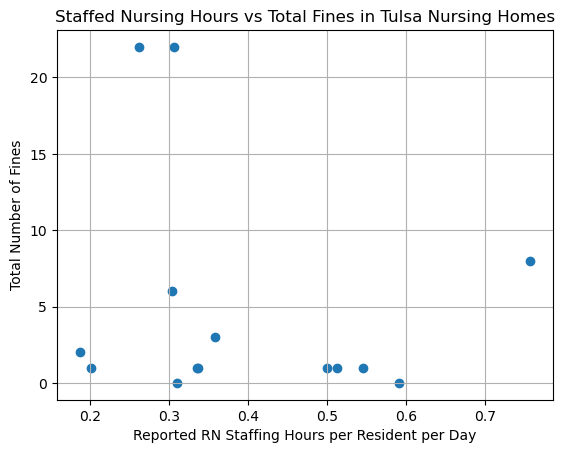

In [7]:
# Examining the total rn on site per day per resident and the total fines that a nursing home has recieved to see if there is a correlation in Tulsa specifically. 
x_val = tulsa_data['Reported RN Staffing Hours per Resident per Day']
y_val = tulsa_data['Number of Fines']
plt.scatter(x_val, y_val)
plt.xlabel('Reported RN Staffing Hours per Resident per Day')
plt.ylabel('Total Number of Fines')
plt.title('Staffed Nursing Hours vs Total Fines in Tulsa Nursing Homes')
plt.grid()

The correlation between the total fines and the reported RN staffed hours per day is -0.18. This means that there is a weak, negative correlation. The total number of fines is affected negatively based on the total number of hours staffed, but not by a lot. This can be seen by the relatively horizontal linear regression.


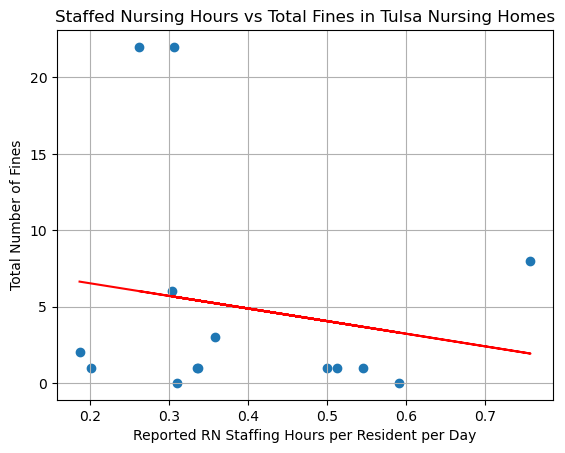

In [8]:
cor_coefficent, p_value = st.pearsonr(x_val, y_val)

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)
plt.plot(x_val, (slope*x_val + intercept), color="red")
plt.scatter(x_val, y_val)
plt.xlabel('Reported RN Staffing Hours per Resident per Day')
plt.ylabel('Total Number of Fines')
plt.title('Staffed Nursing Hours vs Total Fines in Tulsa Nursing Homes')
plt.grid()
plt.savefig('Fines_vs_Nurse_hours.png')

print(f"The correlation between the total fines and the reported RN staffed hours per day is {round(cor_coefficent,2)}. This means that there is a weak, negative correlation. The total number of fines is affected negatively based on the total number of hours staffed, but not by a lot. This can be seen by the relatively horizontal linear regression.")

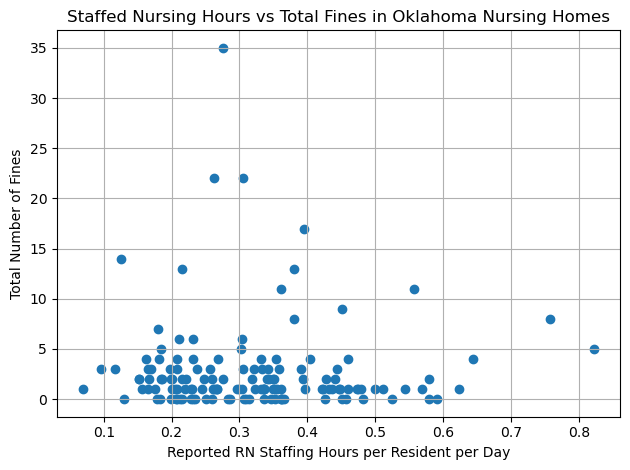

In [9]:
# Examining the total rn on site per day per resident and the total fines that a nursing home has recieved to see if there is a correlation in Oklahoma.
x_val_ok = ok_reduced_data['Reported RN Staffing Hours per Resident per Day']
y_val_ok = ok_reduced_data['Number of Fines']
plt.scatter(x_val_ok, y_val_ok)
plt.xlabel('Reported RN Staffing Hours per Resident per Day')
plt.ylabel('Total Number of Fines')
plt.title('Staffed Nursing Hours vs Total Fines in Oklahoma Nursing Homes')
plt.grid()
plt.tight_layout()

The correlation between the total fines and the reported RN staffed hours per day is -0.01. This means that there is a weak, negative correlation. The total number of fines is affected negatively based on the total number of hours staffed, but not by a lot. This can be seen by the relatively horizontal linear regression.


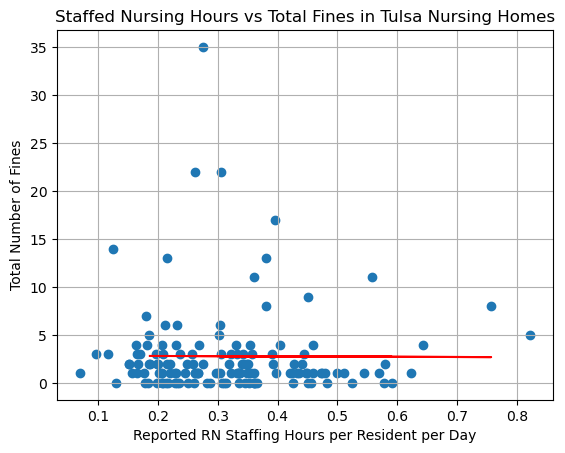

In [10]:
cor_coefficent, p_value = st.pearsonr(x_val_ok, y_val_ok)

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val_ok, y_val_ok)
plt.plot(x_val, (slope*x_val + intercept), color="red")
plt.scatter(x_val_ok, y_val_ok)
plt.xlabel('Reported RN Staffing Hours per Resident per Day')
plt.ylabel('Total Number of Fines')
plt.title('Staffed Nursing Hours vs Total Fines in Tulsa Nursing Homes')
plt.grid()

print(f"The correlation between the total fines and the reported RN staffed hours per day is {round(cor_coefficent,2)}. This means that there is a weak, negative correlation. The total number of fines is affected negatively based on the total number of hours staffed, but not by a lot. This can be seen by the relatively horizontal linear regression.")

### Total Fines VS Overall Rating

In [26]:
#Binning based on the number of fines. 
fine_bins = [-.01,3,6,10, 30]
labels = ["0-3 fines","4-6 fines", "7-10 fines", "11+ fines"]

grouped_fines = pd.cut(tulsa_data['Number of Fines'], bins=fine_bins, labels=labels)

tulsa_data['Fine Categories'] = grouped_fines
tulsa_data[['CMS Certification Number (CCN)', 'Provider Name', 'Provider Address',
       'City/Town', 'State', 'Ownership Type', 'Overall Rating',
       'Health Inspection Rating', 'QM Rating', 'Long-Stay QM Rating',
       'Short-Stay QM Rating', 'Staffing Rating',
       'Reported RN Staffing Hours per Resident per Day',
       'Total nursing staff turnover', 'Number of Fines','Fine Categories',
       'Total Amount of Fines in Dollars', 'Total Number of Penalties']]
tulsa_data       

,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,Ownership Type,Overall Rating,Health Inspection Rating,QM Rating,Long-Stay QM Rating,Short-Stay QM Rating,Staffing Rating,Reported RN Staffing Hours per Resident per Day,Total nursing staff turnover,Number of Fines,Total Amount of Fines in Dollars,Total Number of Penalties,Fine Categories
0,375094,EMERALD CARE CENTER TULSA,2425 SOUTH MEMORIAL,TULSA,OK,For profit - Limited Liability company,1.0,1.0,3.0,3.0,2.0,1.0,0.26225,76.7,22,207430.15,23,11+ fines
1,375168,AMBASSADOR MANOR NURSING CENTER,1340 EAST 61ST STREET,TULSA,OK,For profit - Partnership,2.0,2.0,2.0,4.0,1.0,2.0,0.33464,60.0,1,655.01,1,0-3 fines
2,375172,SOUTHERN HILLS REHABILITATION CENTER,5170 SOUTH VANDALIA,TULSA,OK,For profit - Corporation,2.0,2.0,2.0,2.0,2.0,2.0,0.30572,74.0,22,83494.15,23,11+ fines
3,375230,LEISURE VILLAGE HEALTH CARE CENTER,2154 SOUTH 85TH EAST AVENUE,TULSA,OK,For profit - Partnership,2.0,2.0,3.0,3.0,2.0,2.0,0.35752,73.4,3,11738.20,3,0-3 fines
4,375389,TULSA NURSING CENTER,10912 EAST 14TH STREET,TULSA,OK,For profit - Limited Liability company,3.0,2.0,5.0,5.0,3.0,3.0,0.49927,78.6,1,655.14,2,0-3 fines
5,375454,"TRINITY WOODS, INC.",4134 EAST 31ST STREET,TULSA,OK,Non profit - Church related,3.0,3.0,4.0,3.0,5.0,4.0,0.33622,52.1,1,650.00,1,0-3 fines
6,375460,"MONTEREAU, INC",6800 SOUTH GRANITE AVENUE,TULSA,OK,Non profit - Corporation,5.0,5.0,4.0,3.0,4.0,4.0,0.51174,66.7,1,650.00,1,0-3 fines
7,375476,COVENANT LIVING AT INVERNESS,3800 WEST 71ST STREET SOUTH,TULSA,OK,Non profit - Corporation,4.0,4.0,4.0,3.0,4.0,4.0,0.59124,68.8,0,0.00,0,0-3 fines
8,375489,THE COTTAGE EXTENDED CARE,7707 SOUTH MEMORIAL DRIVE,TULSA,OK,For profit - Individual,3.0,3.0,4.0,4.0,3.0,3.0,0.30348,70.3,6,8865.48,6,4-6 fines
9,375531,UNIVERSITY VILLAGE RETIREMENT COMMUNITY,8555 SOUTH LEWIS AVENUE,TULSA,OK,For profit - Corporation,3.0,3.0,2.0,1.0,2.0,4.0,0.54460,71.9,1,18547.75,1,0-3 fines


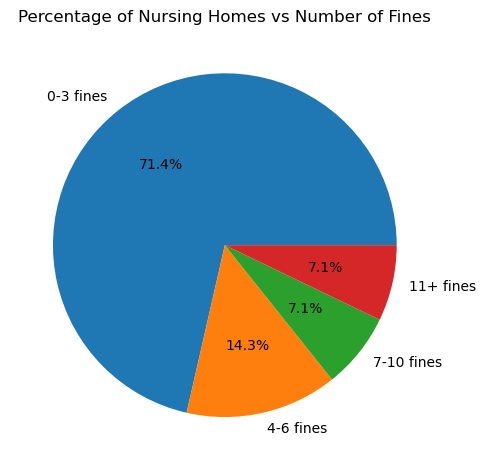

In [27]:
# creating a bar graph of the number of fines.
x_value = tulsa_data['Fine Categories'].value_counts()
#y_value = tulsa_data['Overall Rating']
plt.pie(x_value, labels = labels, autopct='%1.1f%%')
plt.title('Percentage of Nursing Homes vs Number of Fines')
plt.tight_layout()

### Comparing the Overall Rating to the total number of fines.

The correlation between the total fines and the reported RN staffed hours per day is -0.53. This means that there is a negative correlation. The overall rating is affected negatively based on the total number of fines. This can be seen by the downward sloping linear regression.


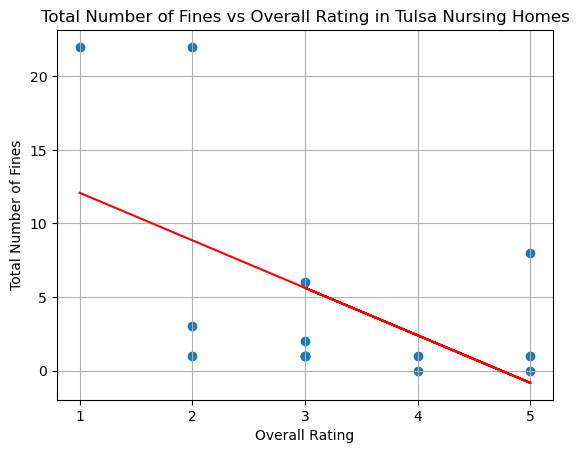

In [21]:
#Evaluating the overall rating of each nursing home and the number of fines to see if there is a relationship.
x_value_rating = tulsa_data['Overall Rating'] 
y_value_fines = tulsa_data['Number of Fines']

cor_coefficent, p_value = st.pearsonr(x_value_rating, y_value_fines)

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value_rating, y_value_fines)
plt.plot(x_value_rating, (slope*x_value_rating + intercept), color="red")
plt.scatter(x_value_rating, y_value_fines)
plt.xlabel('Overall Rating')
plt.xticks([1.0, 2.0, 3.0, 4.0, 5.0])
plt.ylabel('Total Number of Fines')
plt.title('Total Number of Fines vs Overall Rating in Tulsa Nursing Homes')
plt.grid()

print(f"The correlation between the total fines and the reported RN staffed hours per day is {round(cor_coefficent,2)}. This means that there is a negative, medium correlation. The overall rating is affected negatively based on the total number of fines. This can be seen by the downward sloping linear regression.")

The correlation between the total fines and the reported RN staffed hours per day is -0.33. This means that there is a negative correlation. The overall rating is affected negatively based on the total number of fines. This can be seen by the downward sloping linear regression.


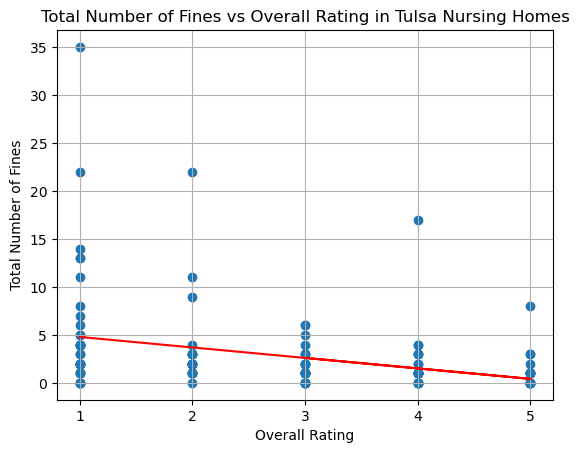

In [22]:
x_value_rating = ok_reduced_data['Overall Rating'] 
y_value_fines = ok_reduced_data['Number of Fines']

cor_coefficent, p_value = st.pearsonr(x_value_rating, y_value_fines)

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value_rating, y_value_fines)
plt.plot(x_value_rating, (slope*x_value_rating + intercept), color="red")
plt.scatter(x_value_rating, y_value_fines)
plt.xlabel('Overall Rating')
plt.xticks([1.0, 2.0, 3.0, 4.0, 5.0])
plt.ylabel('Total Number of Fines')
plt.title('Total Number of Fines vs Overall Rating in Tulsa Nursing Homes')
plt.grid()

print(f"The correlation between the total fines and the reported RN staffed hours per day is {round(cor_coefficent,2)}. This means that there is a negative correlation. The overall rating is affected negatively based on the total number of fines. This can be seen by the downward sloping linear regression.")